# Fayette County E-Scooters & Bicycles Data Exploration

This project is devoted to exploring data related to collisions, injuries, and deaths between bicycles and scooters since the beginning of the Fayette County E-Scooter Project in the spring of 2018. Data analysis including charts will be used to explore the datasets provided by the Lexington Fayette County Data and Analysis Department. Note that two separate datasets were compiled and sent from the LFPD. One concerns data entries solely related to 'e-scooter' searches as well as one for 'bicycle' searches. The second database is the comprehensive list of bicycle and e-scooter-related police reports concerning collisions and injuries. 

The LFPD has some notes that should be made clear concerning this data. One, it was impossible to determine "motor-scooters" from "e-scooters". This means that injuries related to e-scooters are roped in with general motor scooters, so it's difficult to determine if they come from commercial brands like Lime/Bird or are private motor scooters. Two, the lat/lng points of collisions have been censored and are triangulated to the nearest intersection. This gives privacy to involved parties and protects their identities. 

In [18]:
import re
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data from csv files provided by Lexington-Fayette Police Department 

# first, the narrative searches for 'bicycle' or 'scooter' collisions data
bicycle_collisions_narrative = pd.read_csv('../data/csv/LFPD_data/csv/bicycle_narrative_search.csv')
scooter_collisions_narrative = pd.read_csv('../data/csv/LFPD_data/csv/scooter_narrative_search.csv')

# next, the full bicycle and scooter collision data 
bicycles_all_collisions = pd.read_csv('../data/csv/LFPD_data/csv/all_collision_bicyles.csv')
scooters_all_collisions = pd.read_csv('../data/csv/LFPD_data/csv/all_scooter_collisions.csv')

In [3]:
# Create DataFrames 
# for scooters
scooter_search = pd.DataFrame(scooter_collisions_narrative)
all_scooter = pd.DataFrame(scooters_all_collisions)

# for bicycles
bicycle_search = pd.DataFrame(bicycle_collisions_narrative)
all_bicycle = pd.DataFrame(bicycles_all_collisions)

## Data Cleanup Pt. 1
### Initial Exploration and DataFrame Manipulation Phase

### All Scooters Data

Let's begin with examining the entire scooters database and look at the data

In [4]:
# print the dfa
all_scooter

,MFN,DATE,TIME,DOW,STR#,DIR,ROADWAY,SUF,MP,LATITUDE,...,#VEH#,#KILL,#INJURED,WEATHER,RD\COND,H&R,DIRECTIONAL ANALYSIS,MANNER,RDCHAR,LIGHT COND
0,72361205,6/2/2019,2037,Sunday,NaN,NaN,TATES CREEK,RD,7.312,37.962833,...,2,0,1,CLEAR,DRY,False,OTHER INTERSECTION COLLISIONS,REAR END,STRAIGHT & GRADE,DAYLIGHT
1,72365079,6/10/2019,2113,Monday,NaN,NaN,DE ROODE,ST,0.341,38.049801,...,2,0,0,CLEAR,DRY,False,1 VEHICLE PARKED POSITION (NOT PARKING LOT/DRI...,REAR END,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
2,72375575,7/4/2019,1814,Thursday,NaN,NaN,VILLAGE,DR,0.311,38.048873,...,2,0,1,CLEAR,DRY,True,ANGLE COLLISION - OTHER,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
3,72378150,7/11/2019,1440,Thursday,NaN,NaN,ALEXANDRIA,DR,4.104,38.031740,...,1,0,1,CLEAR,DRY,False,OTHER INTERSECTION COLLISIONS,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
4,72383937,7/24/2019,2154,Wednesday,NaN,NaN,CAULDER,RD,0.128,37.978714,...,2,0,1,CLEAR,DRY,False,ANGLE COLLISION - ONE VEHICLE TURNING LEFT,ANGLE,STRAIGHT & GRADE,DARK-HWY LIGHTED/ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,72767497,5/30/2022,1258,Monday,NaN,NaN,CODELL,DR,0.283,38.012336,...,2,0,0,CLEAR,DRY,False,ANGLE COLLISION - OTHER,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
90,72771854,6/12/2022,1253,Sunday,NaN,NaN,TOWNE CENTER,DR,0.074,38.068239,...,2,0,0,CLEAR,DRY,False,HEAD-ON COLLISION,HEAD ON,STRAIGHT & LEVEL,DAYLIGHT
91,72772526,6/13/2022,1210,Monday,NaN,NaN,WINTERBERRY,DR,0.011,38.026383,...,1,0,0,CLEAR,DRY,False,COLLISION WITH NON-FIXED OBJECT,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
92,72773047,6/15/2022,1654,Wednesday,NaN,NaN,HARRODSBURG,RD,3.831,38.022885,...,1,0,1,CLEAR,DRY,False,COLLISION WITH FIXED OBJECT NON - INTERSECTION...,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT


In [5]:
## now let's look at the scooter info including Dtypes, number  
all_scooter.info()

# check the dtypes afterwards
all_scooter.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MFN                   94 non-null     int64  
 1   DATE                  94 non-null     object 
 2   TIME                  94 non-null     int64  
 3   DOW                   94 non-null     object 
 4   STR#                  14 non-null     float64
 5   DIR                   22 non-null     object 
 6   ROADWAY               94 non-null     object 
 7   SUF                   84 non-null     object 
 8   MP                    91 non-null     float64
 9   LATITUDE              94 non-null     float64
 10  LONGITUDE             94 non-null     float64
 11  INTERSECTION          39 non-null     object 
 12  #UNITS                94 non-null     int64  
 13  #VEH#                 94 non-null     int64  
 14  #KILL                 94 non-null     int64  
 15  #INJURED              94 

MFN                       int64
DATE                     object
TIME                      int64
DOW                      object
STR#                    float64
DIR                      object
ROADWAY                  object
SUF                      object
MP                      float64
LATITUDE                float64
LONGITUDE               float64
INTERSECTION             object
#UNITS                    int64
#VEH#                     int64
#KILL                     int64
#INJURED                  int64
WEATHER                  object
RD\COND                  object
H&R                        bool
DIRECTIONAL ANALYSIS     object
MANNER                   object
RDCHAR                   object
LIGHT COND               object
dtype: object

In [6]:
## rename columns to be more friendly 
all_scooter.rename(columns = {'#Units': 'Units', 'RD\COND':'Road_cond', 'H&R':'HitAndRun', 'DOW':'DoW', '#KILL':'Killed', '#INJURED':'Injured', '#VEH#':'Number of Vehicles Involved', 'DIRECTIONAL ANALYSIS':'Direction'}, inplace=True)

In [7]:
# what are the counts of different fields?
all_scooter.HitAndRun.value_counts()

False    69
True     25
Name: HitAndRun, dtype: int64

#### Average number of hit and runs involving motorized scooters for Fayette County

**True (25) / False (69) = 0.3623**

wow! ~36% of scooter injuries are hit and runs. 
That seems a little high, but maybe we should compare this number to other national averages later for this project. 

Next, let's take a look at the weather conditions involved with scooter collisions here in Lexington. Do wet conditions have any effect on the number of collisions?:




In [8]:
# what are the different values/counts for road conditions with scooters?
all_scooter.Road_cond.value_counts()


DRY      85
WET       8
OTHER     1
Name: Road_cond, dtype: int64

Interesting. Most scooter collisions take place during dry road conditions. It seems likely that people do not use scooters in Lexington during rainstorms. :D Or better yet, wet road conditions have little effect on the number of incidents. And why is there one 'other' condition? It's likely debris in the road or some other outlier reason that would affect road conditions. 

Next, I'm going to check against the weather field value counts and see how they correspond with the road conditions.

In [9]:
# Let's go over the weather data field next. See if there is a correlation between weather and wet road conditions
all_scooter.WEATHER.value_counts()

CLEAR      74
CLOUDY     13
RAINING     6
OTHER       1
Name: WEATHER, dtype: int64

Looks like the weather patterns correspond roughly to the road conditions. There are 8 wet road condition collisions and that corresponds with the roughly 6 weather conditions described in the police report. We can safely say that weather and road conditions do not showcase any leading causal data to related to the frequency of Lexington's motorized scooter incidents.

But right now, I am more concerned with the injury/death data and would like to move forward with that. Before we finish the analysis, let's remember to convert the csv to a geoDataFrame with Lat/long values as the geometries. 

Next, let's take a look at injuries counts.

In [16]:
# Check the values for number of injuries  
all_scooter.Injured.values

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [17]:
# What are the counts of these numbers?
all_scooter.Injured.value_counts()

1    49
0    39
2     6
Name: Injured, dtype: int64

Looks like there are about ten more single injury-related collisions as non-injury. About 7% of all collisions with motor scooters result in 2 injuries. 

Text(0.5, 1.0, '# of Injuries by day of the week')

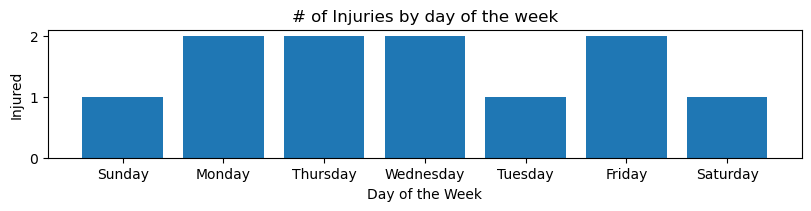

In [25]:
fig, ax = plt.subplots(figsize=(8, 2), layout='constrained')
ax.bar('DoW', 'Injured', data=all_scooter, edgecolor='white')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Injured' )
ax.set_title('# of Injuries by day of the week')

## Scooter Narrative Search Database

In [11]:
# set the index row 1 as header for pandas dataframe column
scooter_collisions_narrative.columns = scooter_collisions_narrative.iloc[0]

# remove the first row that has the old column names 
scooter_collisions_narrative = scooter_collisions_narrative[1:]

# print the df
scooter_collisions_narrative

,MFN,DATE,TIME,DOW,STR#,DIR,ROADWAY,SUF,MP,LATITUDE,...,#VEH#,#KILL,#INJURED,WEATHER,RD\COND,H&R,DIRECTIONAL ANALYSIS,MANNER,RDCHAR,LIGHT COND
1,72375575,7/4/19,1814,Thursday,NaN,NaN,VILLAGE,DR,0.311,38.04887251,...,2,0,1,CLEAR,DRY,true,ANGLE COLLISION - OTHER,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
2,72387418,8/1/19,0814,Thursday,NaN,NaN,ALUMNI,DR,1.825,38.00716915,...,2,0,0,CLEAR,DRY,false,OPPOSING LEFT TURN,OPPOSING LEFT TURN,CURVE & GRADE,DAYLIGHT
3,72392613,8/13/19,1248,Tuesday,NaN,NaN,LIBERTY,RD,0.67,38.03499327,...,1,0,1,CLEAR,DRY,false,COLLISION WITH FIXED OBJECT NON - INTERSECTION...,SINGLE VEHICLE,STRAIGHT & GRADE,DAYLIGHT
4,72419029,10/10/19,1943,Thursday,NaN,NaN,PINE,ST,0.075,38.04346996,...,2,0,2,CLEAR,DRY,false,OPPOSING LEFT TURN,OPPOSING LEFT TURN,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
5,72425069,10/23/19,1518,Wednesday,NaN,NaN,VIRGINIA,AVE,0.024,38.0350012,...,2,0,0,CLEAR,DRY,true,HEAD-ON COLLISION,HEAD ON,STRAIGHT & LEVEL,DAYLIGHT
6,72425550,10/24/19,1147,Thursday,NaN,NaN,MANCHESTER,ST,7.603,38.05227767,...,2,0,0,CLEAR,DRY,false,REAR END - ONE VEHICLE TURNING LEFT,REAR END,STRAIGHT & LEVEL,DAYLIGHT
7,72447760,12/8/19,0212,Sunday,NaN,E,VINE,ST,13.849,38.04495615,...,2,0,0,CLEAR,DRY,true,SIDESWIPE COLLISION - SAME DIRECTION,SIDESWIPE-SAME DIRECTION,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
8,72450444,12/13/19,1125,Friday,NaN,NaN,TRANSYLVANIA,PARK,0.28,38.03751233,...,1,0,1,CLOUDY,DRY,false,COLLISION WITH PEDESTRIAN IN INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
9,72481872,2/28/20,1500,Friday,NaN,W,LOUDON,AVE,0.23,38.05979338,...,1,0,1,CLOUDY,DRY,true,OTHER INTERSECTION COLLISIONS,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
10,72485005,3/7/20,1438,Saturday,NaN,NaN,DUNKIRK,DR,0.419,38.05606997,...,2,0,1,CLEAR,DRY,false,SIDESWIPE-SAME DIRECTION,SIDESWIPE-SAME DIRECTION,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON


In [12]:
## now let's look at the scooter info including Dtypes, number  
scooter_collisions_narrative.info()

# check the dtypes afterwards
scooter_collisions_narrative.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MFN                   49 non-null     object
 1   DATE                  47 non-null     object
 2   TIME                  47 non-null     object
 3   DOW                   47 non-null     object
 4   STR#                  9 non-null      object
 5   DIR                   20 non-null     object
 6   ROADWAY               47 non-null     object
 7   SUF                   40 non-null     object
 8   MP                    45 non-null     object
 9   LATITUDE              47 non-null     object
 10  LONGITUDE             47 non-null     object
 11  INTERSECTION          21 non-null     object
 12  #UNITS                47 non-null     object
 13  #VEH#                 47 non-null     object
 14  #KILL                 47 non-null     object
 15  #INJURED              47 non-null     obje

0
MFN                     object
DATE                    object
TIME                    object
DOW                     object
STR#                    object
DIR                     object
ROADWAY                 object
SUF                     object
MP                      object
LATITUDE                object
LONGITUDE               object
INTERSECTION            object
#UNITS                  object
#VEH#                   object
#KILL                   object
#INJURED                object
WEATHER                 object
RD\COND                 object
H&R                     object
DIRECTIONAL ANALYSIS    object
MANNER                  object
RDCHAR                  object
LIGHT COND              object
dtype: object

### All Bicycles Database


In [13]:
# set the index row 1 as header for pandas dataframe columns
all_bicycle.columns = all_bicycle.iloc[0]

# remove the first row that has the old column names 
all_bicycle = all_bicycle[1:]
# print the dfa
all_bicycle

,DATE,TIME,DOW,STR#,DIR,ROADWAY,SUF,INTERSECTION,#UNITS,#VEH#,#KILL,#INJURED,WEATHER,RD\COND,H&R,DIRECTIONAL ANALYSIS,MANNER,RDCHAR,LIGHT COND
1,6/1/19,1756,Saturday,NaN,NaN,TRADE,ST,NaN,2,1,0,1,CLEAR,DRY,false,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & GRADE,DAYLIGHT
2,6/2/19,2035,Sunday,NaN,NaN,ROYAL,AVE,NaN,2,1,0,1,CLOUDY,DRY,false,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
3,6/2/19,0140,Sunday,NaN,NaN,RICHMOND,RD,NaN,2,1,0,1,CLEAR,DRY,true,COLLISION WITH PEDESTRIAN NON - INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
4,6/11/19,1902,Tuesday,NaN,NaN,CITATION,BLVD,MAGNOLIA SPRINGS DR,2,1,0,1,CLEAR,DRY,true,COLLISION WITH PEDESTRIAN IN INTERSECTION,SINGLE VEHICLE,NaN,DAYLIGHT
5,6/18/19,1059,Tuesday,1700,NaN,RALEIGH,RD,NaN,2,1,0,0,RAINING,WET,true,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,6/29/22,1303,Wednesday,NaN,NaN,GREENTREE,RD,CASTLETON WAY,2,1,0,1,CLEAR,DRY,false,COLLISION WITH BICYCLE IN INTERSECTION,SINGLE VEHICLE,STRAIGHT & HILLCREST,DAYLIGHT
148,6/30/22,2211,Thursday,NaN,W,HIGH,ST,OLIVER LEWIS WAY,2,1,1,0,CLOUDY,DRY,false,COLLISION WITH BICYCLE IN INTERSECTION,SINGLE VEHICLE,CURVE & GRADE,DARK-HWY LIGHTED/ON
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Bicycle Narrative Search Database 

In [14]:
bicycle_collisions_narrative

,DATE,TIME,DOW,STR#,DIR,ROADWAY,SUF,MP,INTERSECTION,#UNITS,#VEH#,#KILL,#INJURED,WEATHER,RD\COND,H&R,DIRECTIONAL ANALYSIS,MANNER,RDCHAR,LIGHT COND
0,6/1/19,1756.0,Saturday,NaN,NaN,TRADE,ST,0.017,NaN,2,1,0,1,CLEAR,DRY,False,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & GRADE,DAYLIGHT
1,6/2/19,2035.0,Sunday,NaN,NaN,ROYAL,AVE,0.105,NaN,2,1,0,1,CLOUDY,DRY,False,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
2,6/2/19,140.0,Sunday,NaN,NaN,RICHMOND,RD,11.724,NaN,2,1,0,1,CLEAR,DRY,True,COLLISION WITH PEDESTRIAN NON - INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
3,6/11/19,1902.0,Tuesday,NaN,NaN,CITATION,BLVD,3.080,MAGNOLIA SPRINGS DR,2,1,0,1,CLEAR,DRY,True,COLLISION WITH PEDESTRIAN IN INTERSECTION,SINGLE VEHICLE,NaN,DAYLIGHT
4,6/18/19,1059.0,Tuesday,1700.0,NaN,RALEIGH,RD,NaN,NaN,2,1,0,0,RAINING,WET,True,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,6/15/22,2200.0,Wednesday,2300.0,NaN,NEWTOWN,PIKE,4.543,NaN,2,1,0,1,CLEAR,DRY,False,COLLISION WITH NON-FIXED OBJECT,SINGLE VEHICLE,CURVE & LEVEL,DARK-HWY NOT LIGHTED
144,6/18/22,1747.0,Saturday,NaN,NaN,WINCHESTER,RD,9.246,NaN,2,1,1,0,CLEAR,DRY,False,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
145,6/21/22,801.0,Tuesday,NaN,NaN,EASTLAND,PKWY,0.179,NaN,2,1,0,0,CLEAR,DRY,False,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,CURVE & GRADE,DAYLIGHT
146,6/29/22,1303.0,Wednesday,NaN,NaN,GREENTREE,RD,0.665,CASTLETON WAY,2,1,0,1,CLEAR,DRY,False,COLLISION WITH BICYCLE IN INTERSECTION,SINGLE VEHICLE,STRAIGHT & HILLCREST,DAYLIGHT
